In [26]:
import tensorflow as tf           
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt     

In [18]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 9s 1us/step


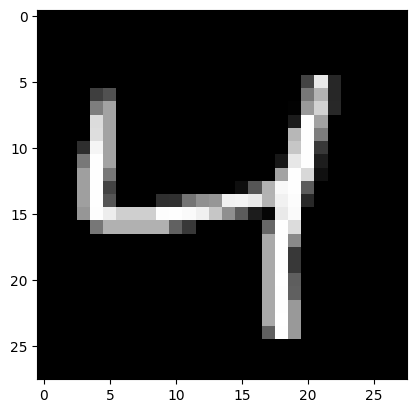

In [21]:
plt.imshow(x_train[2], cmap='gray')

In [22]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [29]:
model = models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation="softmax")
])

c:\Users\DELL\jupyter_env\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
model.compile(optimizer= 'adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [42]:
history = model.fit(x_train , y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9889 - loss: 0.0356
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9909 - loss: 0.0291
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9936 - loss: 0.0216
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9938 - loss: 0.0196
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9951 - loss: 0.0163


In [43]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy:{test_accuracy * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9762 - loss: 0.0934  
Test Accuracy:97.62%


In [44]:
predictions = model.predict(x_test)
print(predictions)
print('Predictions Shape - ', predictions.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step
[[2.39474440e-09 9.26683209e-12 1.08832339e-07 ... 9.99988079e-01
  7.90725636e-08 9.12357245e-06]
 [2.09257722e-10 1.75701553e-06 9.99998212e-01 ... 4.87848442e-20
  8.62449417e-11 2.53558506e-18]
 [3.88261340e-10 9.99950051e-01 6.66411051e-06 ... 1.75684472e-05
  1.27354342e-05 1.33673375e-08]
 ...
 [4.73472412e-16 4.64077182e-13 9.92152985e-17 ... 4.08367296e-09
  1.24205687e-10 8.06438507e-08]
 [7.95265465e-10 1.06359623e-13 3.20098968e-14 ... 6.39282507e-12
  1.85061964e-07 6.94328492e-14]
 [2.44819304e-10 8.94112944e-16 2.87964230e-09 ... 3.20409207e-15
  2.83286892e-12 2.87146565e-12]]
Predictions Shape -  (10000, 10)


In [45]:
predictions[0]

array([2.3947444e-09, 9.2668321e-12, 1.0883234e-07, 2.5122631e-06,
       1.6383275e-13, 4.8002163e-10, 2.3909328e-17, 9.9998808e-01,
       7.9072564e-08, 9.1235725e-06], dtype=float32)

In [46]:
print(np.argmax(predictions[0]))

7


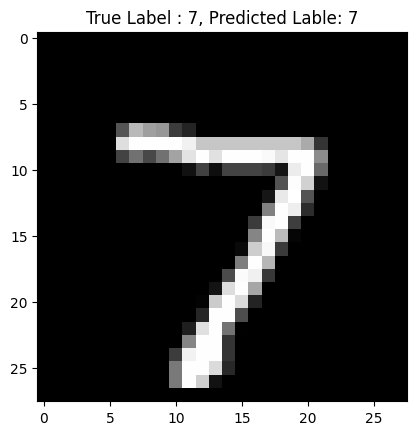

In [47]:
plt.imshow(x_test[0], cmap='gray')
plt.title(f"True Label : {y_test[0]}, Predicted Lable: {(np.argmax(predictions[0]))}")
plt.show()

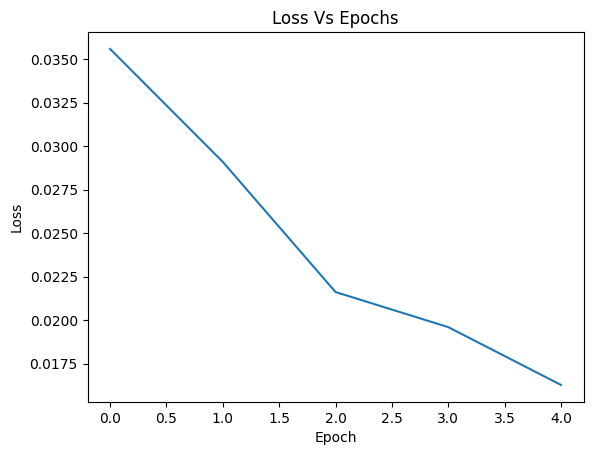

In [49]:
plt.plot(history.history['loss'] ,label = 'Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Vs Epochs')
plt.show()

In [50]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)